In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib as mpl
#显示所有列
pd.set_option('display.max_columns',None)
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('testA.csv')


In [3]:
df_train.shape, df_test.shape


((800000, 47), (200000, 46))

In [5]:
#添加一列
df_train['train_test'] = 'train'
df_test['train_test'] = 'test'


In [6]:
df = df_train.append(df_test)
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)
display(df.head())


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,train_test
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,train
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,train
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,train
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,train
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,train


In [7]:
#打印摘要
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

In [8]:
# 需要处理的列名
is_na_cols = [
    'employmentTitle', 'employmentLength', 'postCode', 'dti', 'pubRecBankruptcies',
    'revolUtil', 'title',] + [f'n{i}' for i in range(15)]


In [9]:
print(is_na_cols)

['employmentTitle', 'employmentLength', 'postCode', 'dti', 'pubRecBankruptcies', 'revolUtil', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [10]:
# 对缺失值 用众数填充
for i in range(len(is_na_cols)):
    most_num = df[is_na_cols[i]].value_counts().index[0]
    df[is_na_cols[i]] = df[is_na_cols[i]].fillna(most_num)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

In [11]:
#分开测试集和训练集
df_train = df[df['train_test'] == 'train']
df_test = df[df['train_test'] == 'test']


In [13]:

del df_train['train_test']
del df_test['train_test']



In [14]:
df_train.shape, df_test.shape


((800000, 47), (200000, 47))

In [15]:
#目标列isDefault代表是否违约
del df_test['isDefault']


In [16]:
# 非数值型
non_numeric_cols = [
    'grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine'
]
# 数值型
numeric_cols = [
    x for x in df_test.columns if x not in non_numeric_cols + ['isDefault']
]
non_numeric_cols, numeric_cols


(['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine'],
 ['id',
  'loanAmnt',
  'term',
  'interestRate',
  'installment',
  'employmentTitle',
  'homeOwnership',
  'annualIncome',
  'verificationStatus',
  'purpose',
  'postCode',
  'regionCode',
  'dti',
  'delinquency_2years',
  'ficoRangeLow',
  'ficoRangeHigh',
  'openAcc',
  'pubRec',
  'pubRecBankruptcies',
  'revolBal',
  'revolUtil',
  'totalAcc',
  'initialListStatus',
  'applicationType',
  'title',
  'policyCode',
  'n0',
  'n1',
  'n2',
  'n3',
  'n4',
  'n5',
  'n6',
  'n7',
  'n8',
  'n9',
  'n10',
  'n11',
  'n12',
  'n13',
  'n14'])

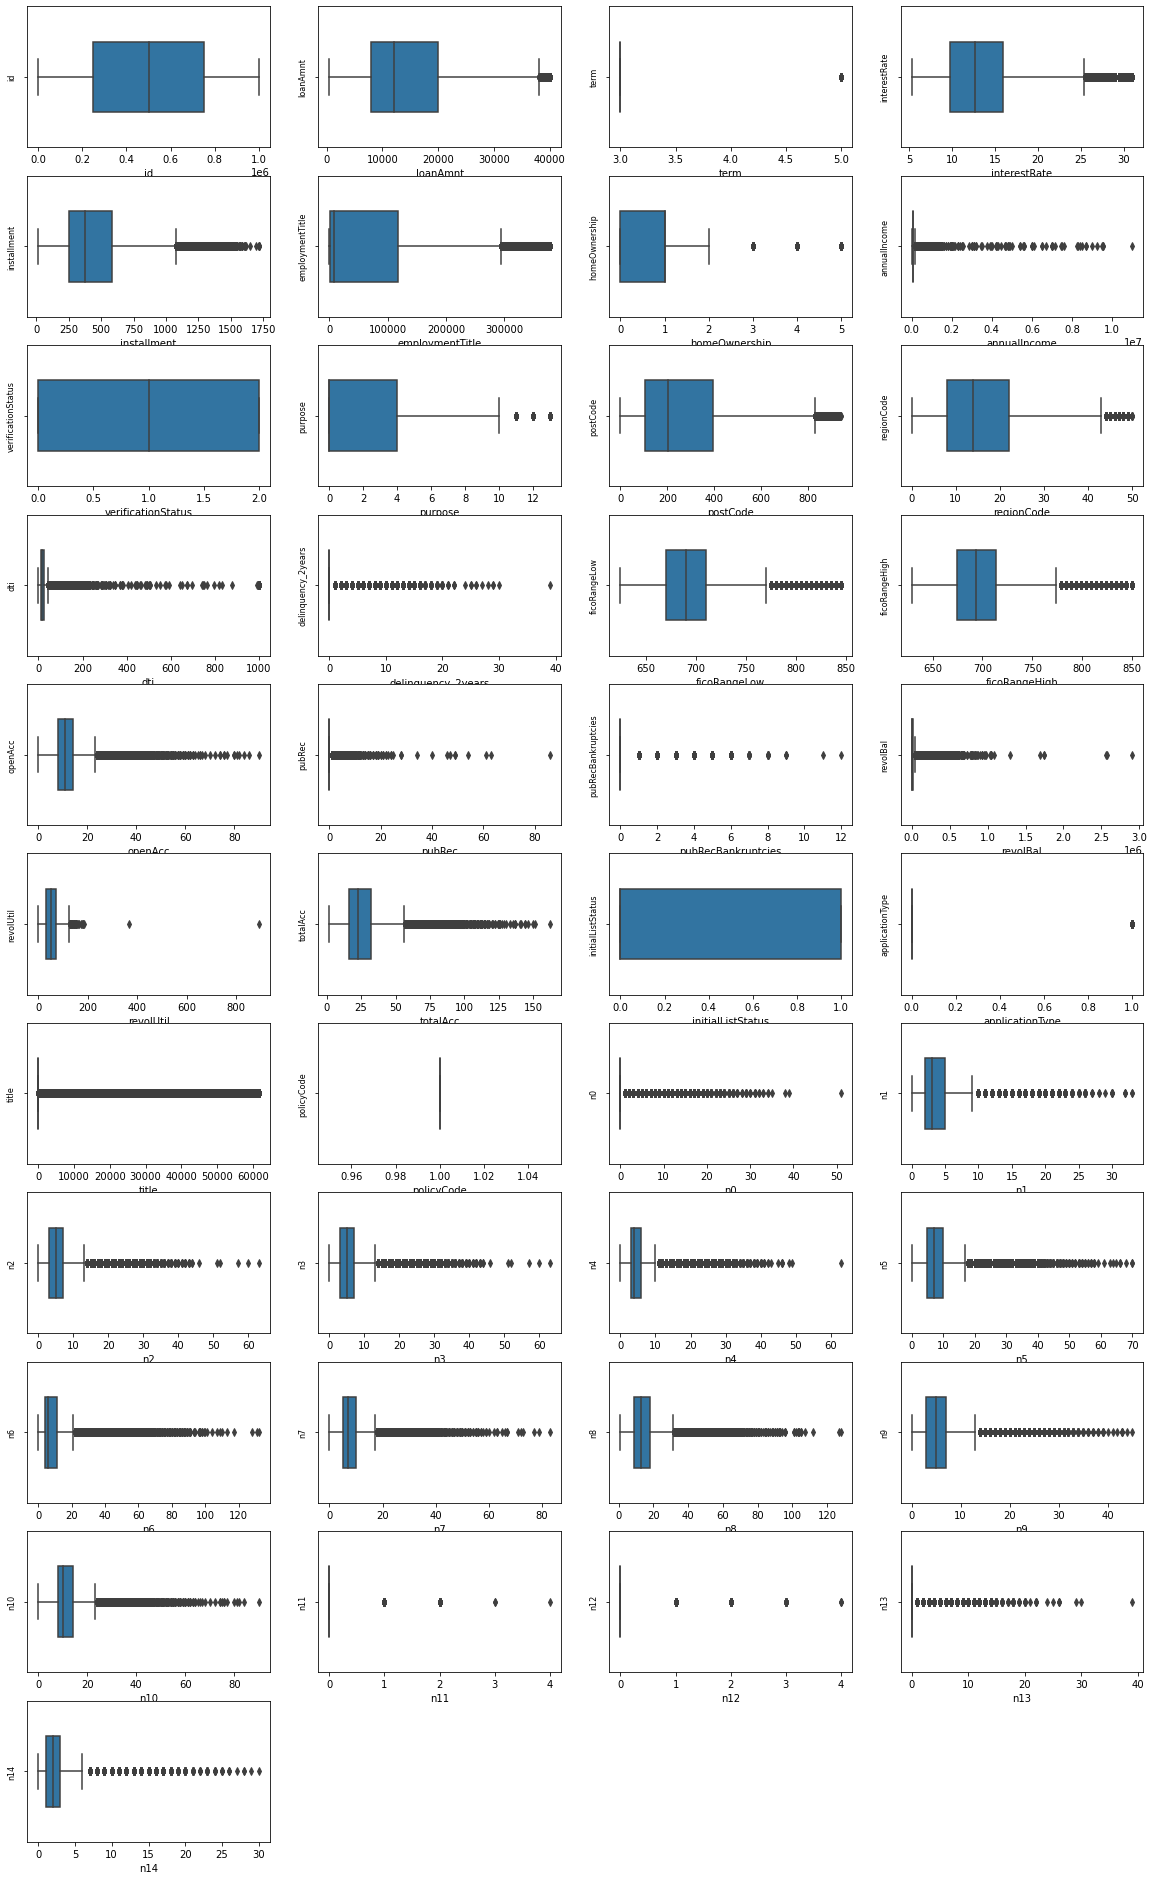

In [17]:
# 画箱式图
column = numeric_cols # 列表头
fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(len(column)):
    plt.subplot(13, 4, i + 1)  # 13行3列子图
    sns.boxplot(df[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.show()


In [18]:
continuous_cols = [
    'id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership',
    'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
    'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'revolBal', 'revolUtil','totalAcc',
    'title', 'n14'
] + [f'n{i}' for i in range(11)] 
non_continuous_cols = [
    x for x in numeric_cols if x not in continuous_cols
]


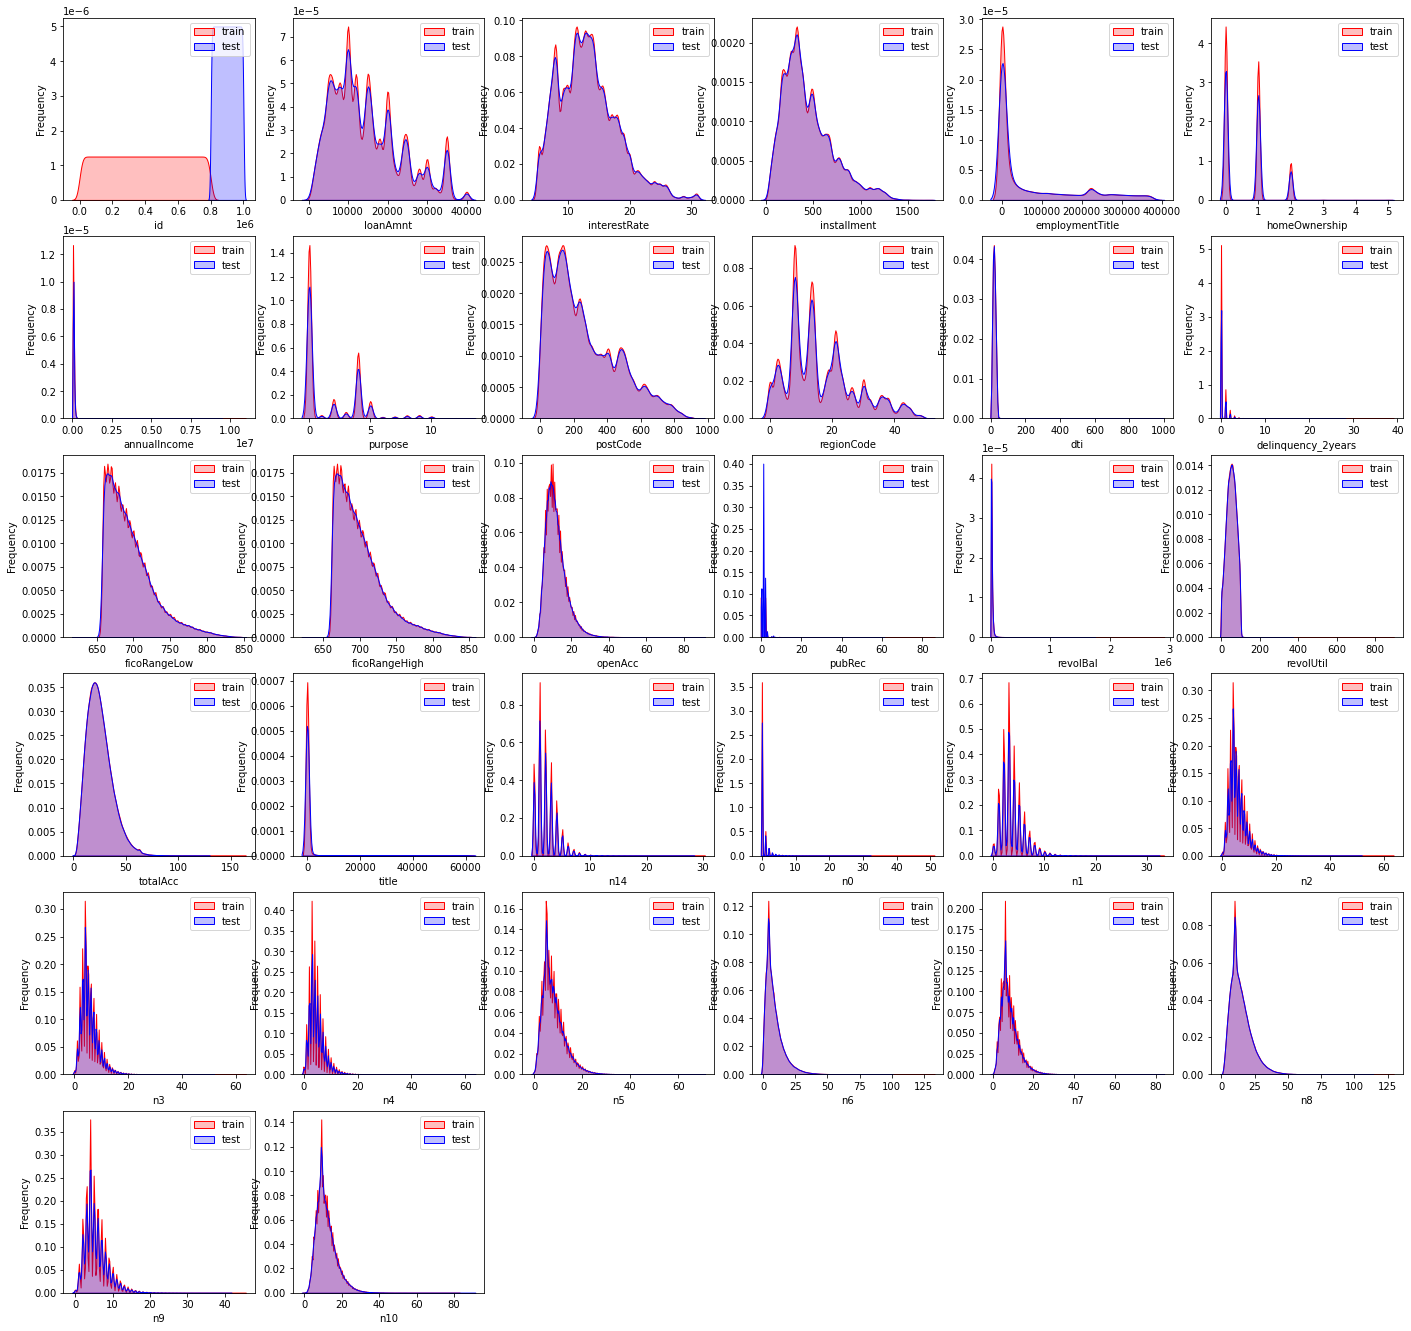

In [19]:
dist_cols = 6
dist_rows = len(df_test[continuous_cols].columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in df_test[continuous_cols].columns:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(df_train[continuous_cols][col], color="Red", shade=True)
    ax = sns.kdeplot(df_test[continuous_cols][col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()


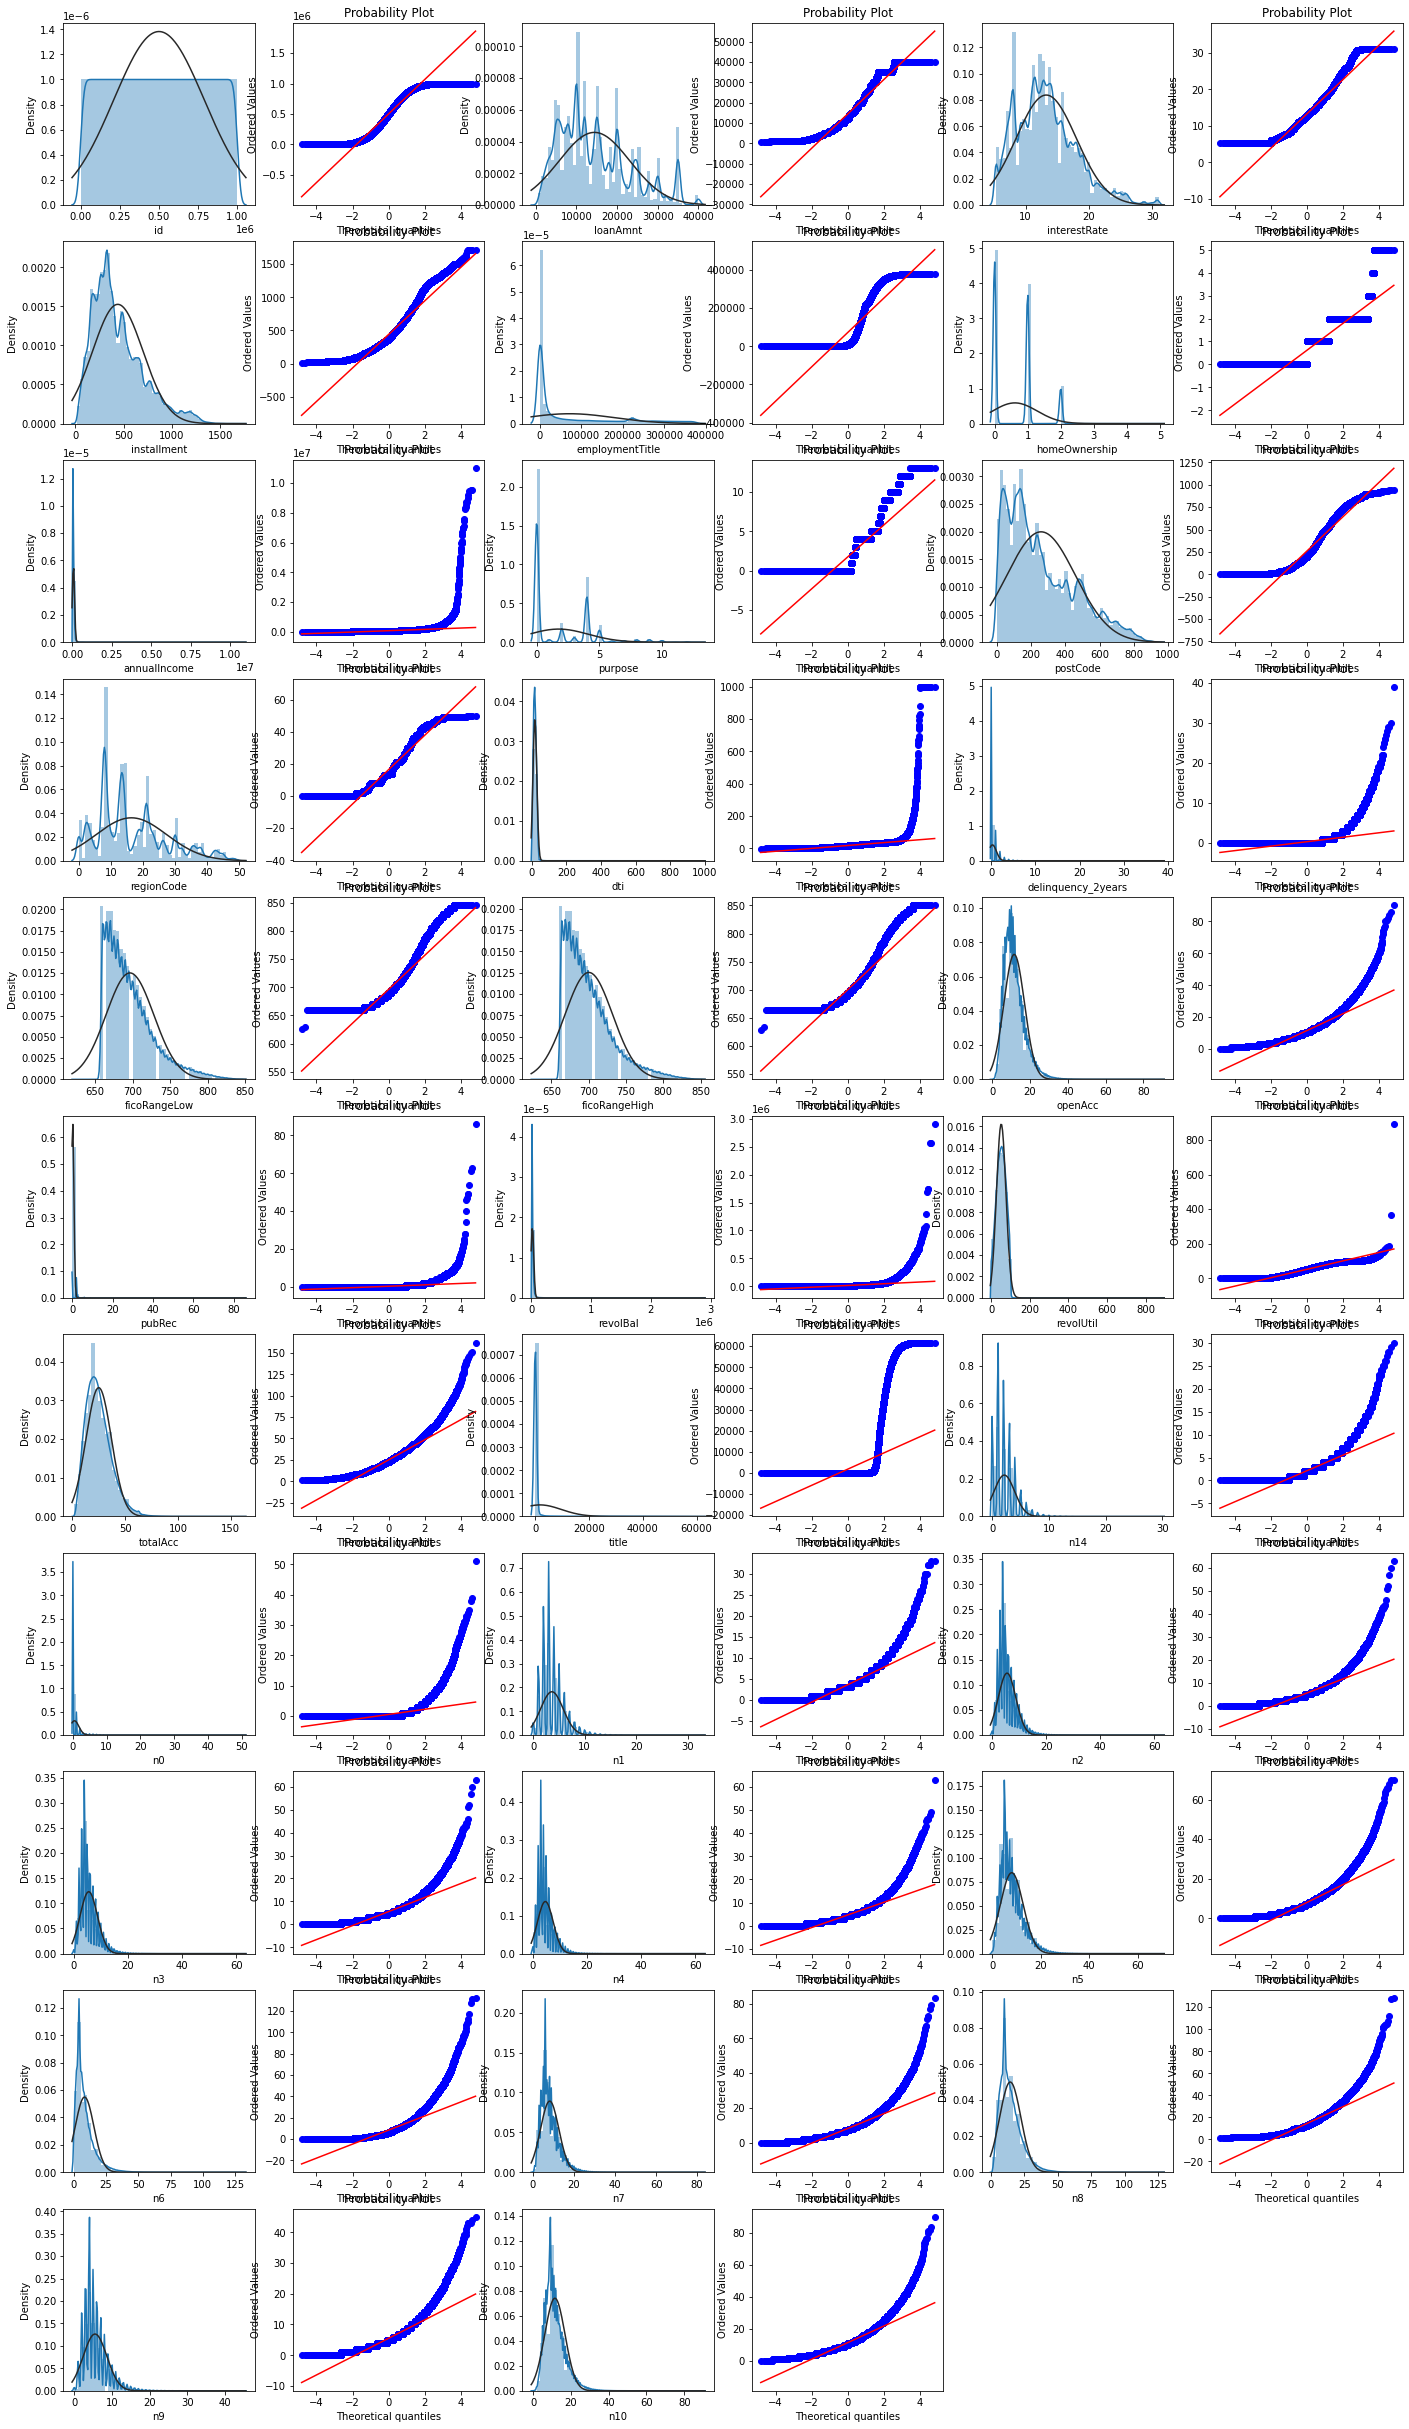

In [20]:
train_cols = 6
train_rows = len(df[continuous_cols].columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in df[continuous_cols].columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(df[continuous_cols][col],fit=stats.norm)
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(df[continuous_cols][col], plot=plt)
plt.show()


In [21]:
for i in range(len(non_continuous_cols)):
    print("%s这列的非连续性数据的分布："%non_continuous_cols[i])
    print(df[non_continuous_cols[i]].value_counts())


term这列的非连续性数据的分布：
3    758733
5    241267
Name: term, dtype: int64
verificationStatus这列的非连续性数据的分布：
1    387568
2    311132
0    301300
Name: verificationStatus, dtype: int64
pubRecBankruptcies这列的非连续性数据的分布：
0.0     875415
1.0     117223
2.0       5726
3.0       1173
4.0        298
5.0        105
6.0         35
7.0         12
8.0          8
9.0          3
11.0         1
12.0         1
Name: pubRecBankruptcies, dtype: int64
initialListStatus这列的非连续性数据的分布：
0    583108
1    416892
Name: initialListStatus, dtype: int64
applicationType这列的非连续性数据的分布：
0    980693
1     19307
Name: applicationType, dtype: int64
policyCode这列的非连续性数据的分布：
1.0    1000000
Name: policyCode, dtype: int64
n11这列的非连续性数据的分布：
0.0    999290
1.0       677
2.0        30
3.0         2
4.0         1
Name: n11, dtype: int64
n12这列的非连续性数据的分布：
0.0    996943
1.0      2883
2.0       150
3.0        21
4.0         3
Name: n12, dtype: int64
n13这列的非连续性数据的分布：
0.0     945512
1.0      40734
2.0       8130
3.0       2232
4.0       1213
5.0      

In [22]:
for i in range(len(non_numeric_cols)):
    print("%s这列非数值型数据的分布：\n"%non_numeric_cols[i])
    print(df[non_numeric_cols[i]].value_counts())


grade这列非数值型数据的分布：

B    292055
C    283819
A    174588
D    149377
E     69671
F     23751
G      6739
Name: grade, dtype: int64
subGrade这列非数值型数据的分布：

C1    63620
B4    61939
B5    61365
B3    60700
C2    58859
C3    55769
C4    55382
B2    55125
B1    52926
C5    50189
A5    47674
A4    38681
D1    38205
D2    33241
A1    32307
D3    29231
A3    28299
A2    27627
D4    26375
D5    22325
E1    17591
E2    15921
E3    13705
E4    11687
E5    10767
F1     7387
F2     5413
F3     4483
F4     3573
F5     2895
G1     2247
G2     1556
G3     1210
G4      917
G5      809
Name: subGrade, dtype: int64
employmentLength这列非数值型数据的分布：

10+ years    387066
2 years       90565
< 1 year      80226
3 years       80163
1 year        65671
5 years       62645
4 years       59818
6 years       46582
8 years       45168
7 years       44230
9 years       37866
Name: employmentLength, dtype: int64
issueDate这列非数值型数据的分布：

2016-03-01    36542
2015-10-01    31918
2015-07-01    30590
2015-12-01    28966
2014-10-01

In [23]:
df['policyCode'].describe()


count    1000000.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policyCode, dtype: float64

In [24]:
# 字段只有一个值，不用了
df.drop('policyCode',axis=1,inplace=True)


In [25]:
df['n13'] = df['n13'].apply(lambda x: 1 if x not in [0] else x)
df['n13'].value_counts()


0.0    945512
1.0     54488
Name: n13, dtype: int64

In [26]:
# 非数值型编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])
df['grade'].value_counts()


1    292055
2    283819
0    174588
3    149377
4     69671
5     23751
6      6739
Name: grade, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['subGrade'] = le.fit_transform(df['subGrade'])
df['subGrade'].value_counts()


10    63620
8     61939
9     61365
7     60700
11    58859
12    55769
13    55382
6     55125
5     52926
14    50189
4     47674
3     38681
15    38205
16    33241
0     32307
17    29231
2     28299
1     27627
18    26375
19    22325
20    17591
21    15921
22    13705
23    11687
24    10767
25     7387
26     5413
27     4483
28     3573
29     2895
30     2247
31     1556
32     1210
33      917
34      809
Name: subGrade, dtype: int64

In [28]:
# 构造编码函数
def encoder(x):
    if x[:-5] == '10+ ':
        return 10
    elif x[:-5] == '< 1':
        return 0
    else:
        return int(x[0])
df['employmentLength'] = df['employmentLength'].apply(encoder)
df['employmentLength'].value_counts()


10    387066
2      90565
0      80226
3      80163
1      65671
5      62645
4      59818
6      46582
8      45168
7      44230
9      37866
Name: employmentLength, dtype: int64

In [29]:
from datetime import datetime
def encoder1(x):
    x = str(x)
    now = datetime.strptime('2020-07-01','%Y-%m-%d')
    past = datetime.strptime(x,'%Y-%m-%d')
    period = now - past
    period = period.days
    return round(period / 30, 2)
df['issueDate'] = df['issueDate'].apply(encoder1)
df['issueDate'].value_counts()


52.77     36542
57.83     31918
60.90     30590
55.80     28966
70.00     26768
          ...  
157.27       27
158.30       25
144.03       24
156.23       11
159.30        1
Name: issueDate, Length: 139, dtype: int64

In [30]:
def encoder2(x):
    if x[:3] == 'Jan':
        return x[-4:] + '-' + '01-01'
    if x[:3] == 'Feb':
        return x[-4:] + '-' + '02-01'
    if x[:3] == 'Mar':
        return x[-4:] + '-' + '03-01'
    if x[:3] == 'Apr':
        return x[-4:] + '-' + '04-01'
    if x[:3] == 'May':
        return x[-4:] + '-' + '05-01'
    if x[:3] == 'Jun':
        return x[-4:] + '-' + '06-01'
    if x[:3] == 'Jul':
        return x[-4:] + '-' + '07-01'
    if x[:3] == 'Aug':
        return x[-4:] + '-' + '08-01'
    if x[:3] == 'Sep':
        return x[-4:] + '-' + '09-01'
    if x[:3] == 'Oct':
        return x[-4:] + '-' + '10-01'
    if x[:3] == 'Nov':
        return x[-4:] + '-' + '11-01'
    if x[:3] == 'Dec':
        return x[-4:] + '-' + '12-01'
df['earliesCreditLine'] = df['earliesCreditLine'].apply(encoder2)
df['earliesCreditLine'].value_counts()


2001-08-01    6957
2002-08-01    6779
2003-09-01    6710
2001-10-01    6636
2004-09-01    6556
              ... 
1958-04-01       1
1953-05-01       1
2015-10-01       1
1958-03-01       1
1946-08-01       1
Name: earliesCreditLine, Length: 726, dtype: int64

In [31]:
df['earliesCreditLine'] = df['earliesCreditLine'].apply(encoder1)
df['earliesCreditLine'].value_counts()


230.30    6957
218.13    6779
204.93    6710
228.27    6636
192.73    6556
          ... 
57.83        1
791.40       1
720.37       1
847.17       1
764.97       1
Name: earliesCreditLine, Length: 726, dtype: int64

In [32]:
train = df[df['train_test'] == 'train']
test = df[df['train_test'] == 'test']


In [33]:
del test['isDefault']


In [34]:
del train['train_test']
del test['train_test']


In [35]:
train.to_csv('train_process.csv')
test.to_csv('test_process.csv')


In [36]:
# 数据处理
import numpy as np
import pandas as pd

# 数据可视化
import matplotlib.pyplot as plt

# 特征选择和编码
from sklearn.preprocessing import LabelEncoder

# 机器学习
from sklearn import model_selection, tree, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 网格搜索、随机搜索
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 模型度量（分类）
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# 警告处理 
import warnings
warnings.filterwarnings('ignore')

# 在Jupyter上画图
%matplotlib inline


In [37]:
train = pd.read_csv('train_process.csv')
test = pd.read_csv('test_process.csv')
train.shape, test.shape


((800000, 47), (200000, 46))

In [38]:
train.columns,test.columns


(Index(['Unnamed: 0', 'id', 'loanAmnt', 'term', 'interestRate', 'installment',
        'grade', 'subGrade', 'employmentTitle', 'employmentLength',
        'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate',
        'isDefault', 'purpose', 'postCode', 'regionCode', 'dti',
        'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
        'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
        'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
        'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
        'n11', 'n12', 'n13', 'n14'],
       dtype='object'),
 Index(['Unnamed: 0', 'id', 'loanAmnt', 'term', 'interestRate', 'installment',
        'grade', 'subGrade', 'employmentTitle', 'employmentLength',
        'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate',
        'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
        'ficoRangeLow', 'ficoRangeHigh', 'openAcc'

In [39]:
# 删除Unnamed: 0
del train['Unnamed: 0']
del test['Unnamed: 0']


In [40]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = train['isDefault']
data_features_part = train[[x for x in train.columns if x != 'isDefault' and 'id']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)


In [41]:
x_train.head()


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
498932,498932,12000.0,3,11.12,393.55,1,7,238392.0,5,1,140000.0,2,120.73,4,74.0,30,6.98,0.0,730.0,734.0,4.0,0.0,0.0,10734.0,75.1,19.0,1,0,263.77,12818.0,0.0,3.0,4.0,4.0,3.0,5.0,4.0,6.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0
393742,393742,30000.0,3,13.99,1025.19,2,13,8842.0,10,0,225000.0,1,57.83,2,45.0,21,7.51,1.0,695.0,699.0,9.0,0.0,0.0,3467.0,57.8,16.0,0,0,527.60,5.0,1.0,1.0,1.0,1.0,4.0,4.0,6.0,4.0,4.0,1.0,9.0,0.0,0.0,1.0,3.0
754504,754504,6000.0,3,11.53,197.95,1,9,808.0,9,1,24000.0,2,59.87,0,235.0,8,29.80,0.0,685.0,689.0,8.0,0.0,0.0,16843.0,49.1,13.0,0,0,313.50,0.0,0.0,3.0,8.0,8.0,3.0,3.0,2.0,8.0,9.0,8.0,8.0,0.0,0.0,0.0,0.0
97944,97944,8875.0,3,16.20,312.90,2,13,145707.0,8,2,28860.0,2,81.13,4,520.0,24,31.43,0.0,680.0,684.0,11.0,0.0,0.0,5181.0,48.4,50.0,1,0,200.87,24238.0,0.0,1.0,3.0,3.0,2.0,10.0,29.0,7.0,21.0,3.0,11.0,0.0,0.0,0.0,3.0
564369,564369,35000.0,3,13.59,1189.26,2,11,1440.0,3,2,150000.0,1,31.43,3,134.0,8,5.50,1.0,695.0,699.0,4.0,0.0,0.0,10724.0,41.2,13.0,1,0,182.63,3.0,0.0,2.0,2.0,2.0,3.0,6.0,5.0,3.0,8.0,2.0,4.0,0.0,0.0,0.0,1.0


In [42]:
y_train.head()


498932    0.0
393742    0.0
754504    0.0
97944     0.0
564369    0.0
Name: isDefault, dtype: float64

In [43]:
# 绘制AUC曲线
import time
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [44]:
# Logistic Regression
clf1 = LogisticRegression(solver='sag', max_iter=100, multi_class='multinomial')
clf1.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf1.predict(x_train)
test_predict = clf1.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))


The accuracy of the Logistic Regression is: 0.7998890625
The accuracy of the Logistic Regression is: 0.8024


In [45]:
# 网格搜索
from sklearn.model_selection import GridSearchCV
param_grid = {
              'penalty': ['l2', 'l1'],
              'class_weight': [None, 'balanced'],
              'C': [0, 0.1, 0.5, 1],
                'intercept_scaling': [0.1, 0.5, 1]
             }

clf2 = LogisticRegression(solver='sag')
rfc = GridSearchCV(clf2, param_grid, scoring = 'neg_log_loss', cv=3, n_jobs=-1)
rfc.fit(x_train, y_train)
print(rfc.best_score_)
print(rfc.best_params_)


MemoryError: Unable to allocate 55.3 MiB for an array with shape (34, 213334) and data type float64

In [46]:
# Logistic Regression
clf1 = LogisticRegression(solver='sag', max_iter=100, penalty='l2', 
                          class_weight=None, C=0.1, intercept_scaling=0.1)
model = clf1.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf1.predict(x_train)
test_predict = clf1.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))


The accuracy of the Logistic Regression is: 0.799875
The accuracy of the Logistic Regression is: 0.8024


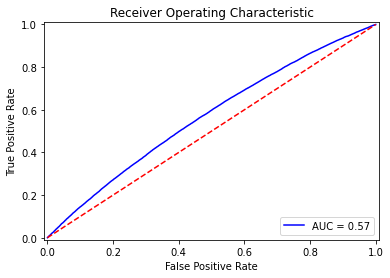

In [47]:
plot_roc_curve(y_test, model.predict_proba(x_test)[:,1])


In [2]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf1.predict(x_train)
test_predict = clf1.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))


NameError: name 'x_train' is not defined